## Boston House Price Prediction
In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.<br>
These are following features -
- CRIM- per capita crime rate by town<br>
- ZN- proportion of residential land zoned for lots over 25,000 sq.ft.<br>
- INDUS- proportion of non-retail business acres per town<br>
- CHAS- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
- NOX- nitric oxides concentration (parts per 10 million)<br>
- RM- average number of rooms per dwelling<br>
- AGE- proportion of owner-occupied units built prior to 1940<br>
- DIS- weighted distances to five Boston employment centres<br>
- RAD- index of accessibility to radial highways<br>
- TAX- full-value property-tax rate per 10,000usd<br>
- PTRATIO- pupil-teacher ratio by town<br>
- B 1000(Bk - 0.63)^2- where Bk is the proportion of blacks by town<br>
- LSTAT- % lower status of the population

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [56]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [57]:
df["Price"]= boston.target

In [58]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [60]:
# Check if there is any missing value in our features
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [61]:
# Finding out the correlation between features
corr = df.corr()

<AxesSubplot:>

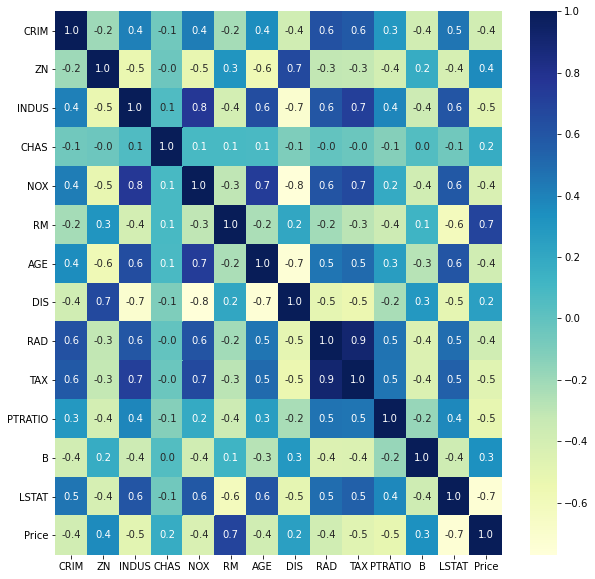

In [62]:
#Plotting the heatmap of correlation between features
plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar = True, fmt= '.1f', annot = True, cmap = 'YlGnBu' )

Now let's check which feature is more correlated with the target variable, we will select only those variable which showing strong correlation with target variable

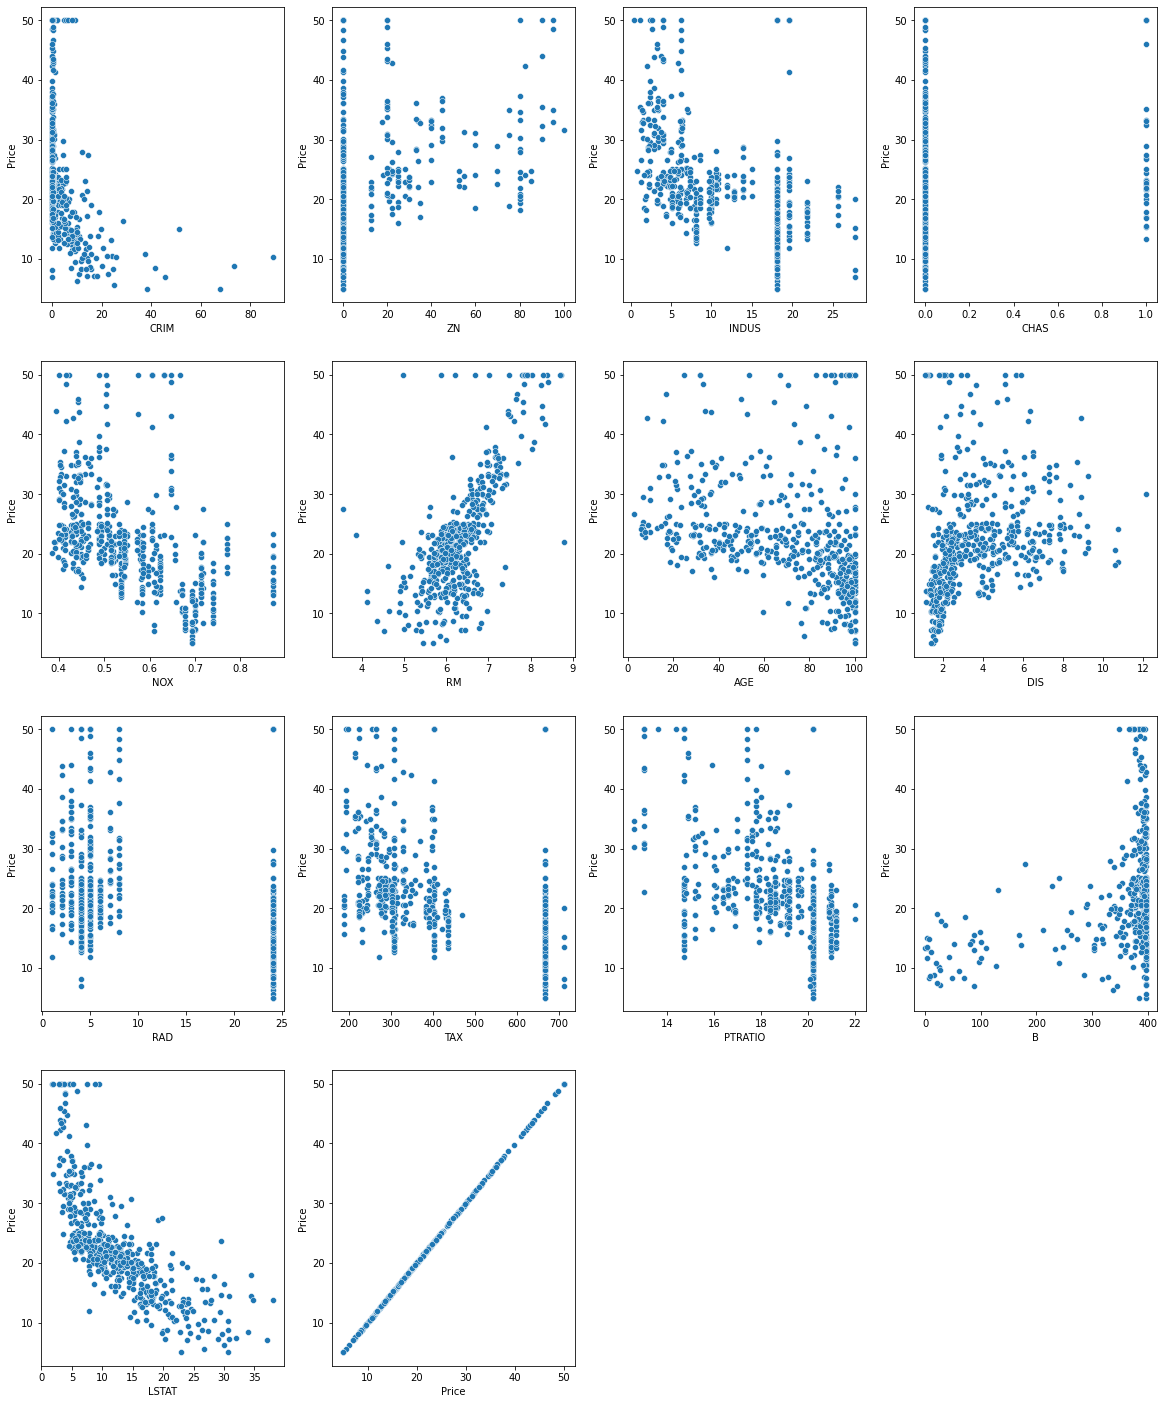

In [63]:
import seaborn as sns
plt.figure(figsize = (20,25), facecolor = 'white')
plot = 1

for column in df:
    if plot<= 14:
        ax = plt.subplot(4,4, plot)   #( nrows, ncols, index)
        sns.scatterplot(df[column],df['Price'])
        plot+= 1
plt.show()    

In [64]:
columns = ['CRIM', 'RM','AGE','DIS', 'LSTAT','Price']    # taking only related columns to target variable(target var included)
df = df[columns]

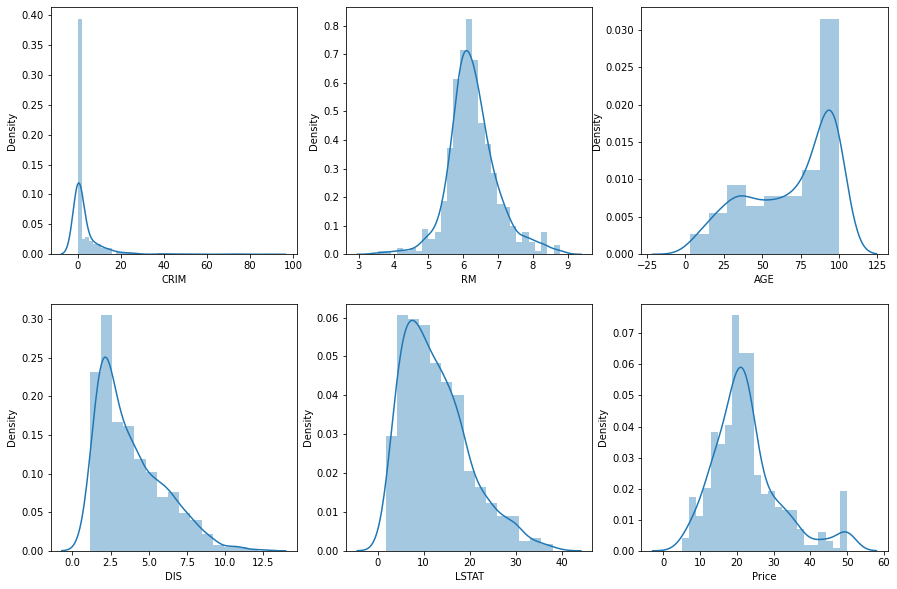

In [65]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,10), facecolor='white')
plot = 1

for column in df:
    if plot<=len(df.columns) :     
        ax = plt.subplot(2,3,plot)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    plot+=1
plt.show()

In [66]:
df.skew()

CRIM     5.223149
RM       0.403612
AGE     -0.598963
DIS      1.011781
LSTAT    0.906460
Price    1.108098
dtype: float64

In [67]:
df[['DIS','LSTAT','CRIM']] = np.log(df[['DIS','LSTAT','CRIM']])

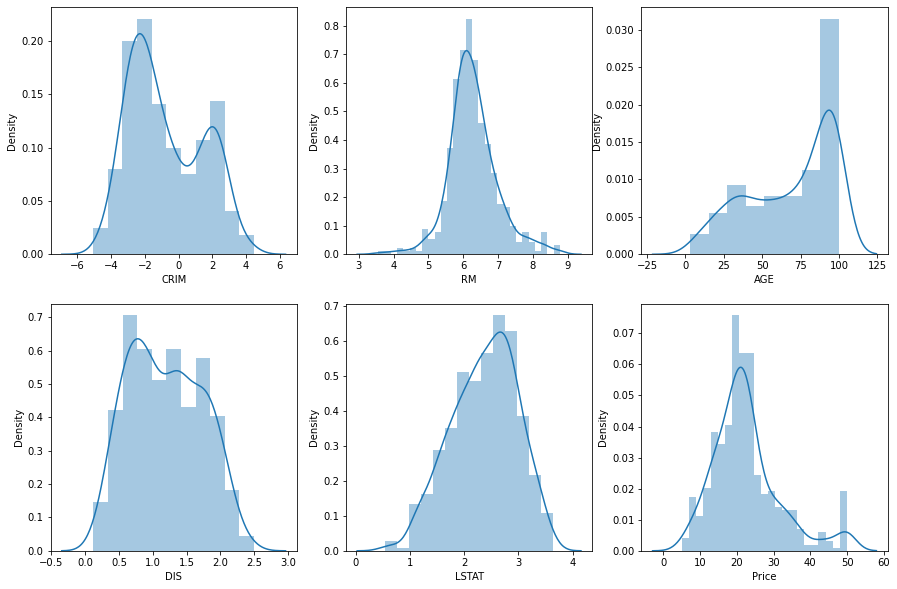

In [68]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,10), facecolor='white')
plot = 1

for column in df:
    if plot<=len(df.columns) :     
        ax = plt.subplot(2,3,plot)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    plot+=1
plt.show()

In [69]:
df.skew()

CRIM     0.405934
RM       0.403612
AGE     -0.598963
DIS      0.152730
LSTAT   -0.320232
Price    1.108098
dtype: float64

<AxesSubplot:>

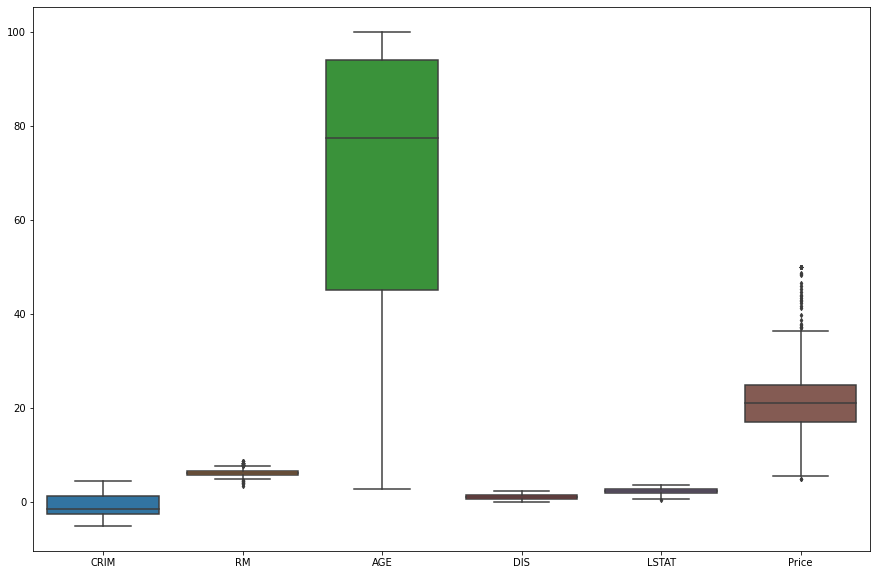

In [70]:
#Let check for the outliers in each column
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = df, fliersize = 3)

In [71]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
iqr = Q3-Q1
upper_boundary = Q3 + 1.5*iqr
lower_boundary = Q1 - 1.5*iqr

In [72]:
upper_boundary

36.962500000000006

In [73]:
#Remove outliers
df['Price'] = df.Price[~(df['Price'] > upper_boundary)] 
df['Price'] = df.Price[~(df['Price'] < lower_boundary)]

<AxesSubplot:>

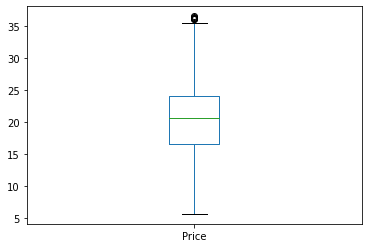

In [74]:
df['Price'].plot(kind = 'box')

In [75]:
X = df.drop(['Price'], axis = 1)
y = df['Price']

In [76]:
X.isna().any()

CRIM     False
RM       False
AGE      False
DIS      False
LSTAT    False
dtype: bool

In [77]:
y.isna().any()

True

In [78]:
y.fillna(method = 'bfill', inplace = True)

In [79]:
y.isna().any()

False

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [81]:
# check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['features'] = X.columns

In [82]:
vif

,VIF,features
0,2.579753,CRIM
1,1.949171,RM
2,3.134973,AGE
3,3.371597,DIS
4,3.119751,LSTAT


As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity, we dont have VIF greater than 5 so we are good to go. but we will check correlation matrix and heatnmap, lets see what happens

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 355)

In [85]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)


RandomForestRegressor()

In [86]:
y_pred = reg.predict(X_test)

In [87]:
y_pred

array([13.891, 16.179, 29.745, 20.798,  9.814, 21.686, 22.97 , 17.487,
       25.733, 14.156, 21.01 , 21.   , 20.203, 19.2  , 10.907, 32.316,
       19.868, 18.176, 21.29 , 14.247, 19.272, 23.646, 31.515, 25.523,
       28.179, 21.743, 29.31 , 33.637, 28.094, 21.249, 22.078, 23.65 ,
       14.264, 20.379, 16.328, 24.283, 31.764, 19.045, 24.478, 23.825,
       20.192, 14.316, 17.997, 16.286, 21.725, 19.693, 24.097, 14.466,
       25.566, 18.083, 20.728, 18.211, 18.676, 32.546, 29.764,  9.733,
       32.172, 24.876, 14.595, 21.801, 17.319, 22.322,  8.815, 21.018,
       25.538, 10.481, 24.929, 31.181, 18.924, 20.003, 15.603, 19.9  ,
       28.953, 17.11 , 20.222, 30.861, 14.499, 14.93 , 20.439, 14.25 ,
       10.689, 18.285, 29.424, 20.41 , 21.252, 33.624, 12.115, 14.177,
       14.832, 29.336, 23.029, 20.413, 33.063, 18.359, 14.003, 23.395,
       18.846, 18.724, 32.559, 23.996, 14.425, 30.96 , 14.632, 22.747,
       13.704, 14.511, 33.449, 16.405, 20.376, 20.467, 21.833, 29.412,
      

In [96]:
# Model Evaluation
print('R-Square:',metrics.r2_score(y_test, y_pred))
print('Adjusted R-Square:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square: 0.7620099321562096
Adjusted R-Square: 0.7585905346297184
MAE: 2.4022105263157894
MSE: 12.107019421052625
RMSE: 3.479514250732798


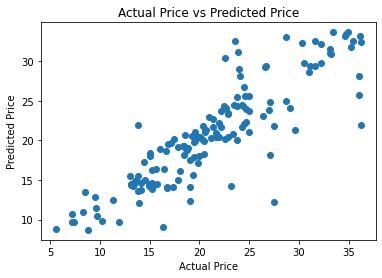

In [97]:
# VIsualizing actual price and predicted price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [105]:
grid_param = {
              'criterion': ['mse','mae'],
              'max_depth' : range(2,30,1),
              'min_samples_split' : range(2,10,1),
              'min_samples_leaf' : range(2,10,1),
              'bootstrap' : [True, False]
             }

In [106]:
grid_search = GridSearchCV(estimator = reg, param_grid = grid_param, cv = 5, n_jobs = -1 )

In [107]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'], 'max_depth': range(2, 30),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)})

In [108]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'mae', 'max_depth': 21, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [110]:
grid_search.best_score_

0.7674773924486519

In [112]:
reg = RandomForestRegressor(criterion ='mae', max_depth= 21, min_samples_leaf = 2, 
                             min_samples_split = 5 , bootstrap = True)
reg.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=21, min_samples_leaf=2,
                      min_samples_split=5)

In [113]:
reg.score(X_test,y_test)

0.7493334398438505

In [114]:
y_pred = reg.predict(X_test)

In [116]:
for i in zip(y_test,y_pred):
    print(i)

(15.2, 14.357499999999995)
(18.0, 16.08749999999999)
(30.5, 29.69699999999998)
(23.4, 21.091999999999995)
(10.2, 10.116499999999997)
(22.2, 22.043500000000005)
(21.0, 24.177499999999995)
(19.1, 16.560000000000006)
(36.0, 24.740500000000008)
(16.7, 14.256000000000002)
(20.6, 21.116500000000002)
(25.0, 21.190999999999995)
(22.6, 19.741)
(17.8, 19.102)
(8.3, 10.628499999999997)
(30.3, 31.8025)
(20.5, 19.730499999999996)
(18.5, 19.06750000000001)
(29.6, 20.879500000000007)
(23.2, 14.285000000000002)
(18.4, 19.278499999999994)
(22.2, 23.518999999999988)
(33.1, 31.115499999999997)
(23.8, 25.1715)
(36.0, 27.571999999999992)
(21.4, 21.103500000000004)
(26.6, 29.468499999999985)
(34.9, 32.905499999999996)
(24.1, 27.89449999999999)
(20.7, 21.269000000000002)
(24.5, 21.6075)
(25.0, 23.903000000000002)
(14.9, 14.239000000000006)
(20.1, 20.007500000000007)
(16.4, 16.719499999999996)
(24.4, 24.15099999999999)
(35.2, 30.7465)
(18.9, 19.011999999999993)
(23.5, 24.565999999999995)
(27.0, 23.77249999999

In [119]:
import pickle
with open(r'C:\Users\SHAKEB\Ineuron Assignments\RandomForestRegression'+ '\model_prediction.sav', 'wb') as f:
    pickle.dump(reg, f)